## American Put Options

First, let's create a path using a geometric brownian motion

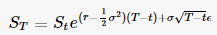

In [1]:
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import sympy; sympy.init_printing()

def display_matrix(m):
    display(sympy.Matrix(m))

In [2]:
def gen_paths(S0, r, vol, T, N, I):
    dt = float(T) / N
    paths = np.zeros((N + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, N + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         vol * np.sqrt(dt) * rand)
    return paths

In [8]:
S0 = 50.
K = 50.
r = 0.05
sigma = 0.234
T = 3
N = 10000
i = 10000
dt = T/(N-1)          # time interval
df = np.exp(-r * dt)  # discount factor per time interval

In [9]:
np.random.seed(123)
S = gen_paths(S0, r, sigma, T, N, i).T

In [12]:
#display_matrix(S)

In [14]:
IVP = np.maximum(K - S, 0)            # intrinsic values for put option
V = np.zeros_like(IVP)                # value matrix
V[:,-1] = H[:,-1]

# Valuation using Longstaff - Schwartz model

In [15]:
for t in range(N-2, 0, -1):

    positive_paths = IVP[:,t] > 0         
    
    reg = np.polyfit( S[positive_paths, t], V[positive_paths, t+1] * df, 2)    # polynomial regression
    C = np.polyval( reg, S[positive_paths,t] )                             # evaluation of regression  
    
    exercise = np.zeros( len(positive_paths), dtype=bool)    
    exercise[positive_paths] = IVP[positive_paths,t] > C          
    
    V[exercise,t] = IVP[exercise,t]                        # set V equal to H where it is optimal to exercise 
    V[exercise,t+1:] = 0                                   # set future cash flows, for that path, equal to zero  
    discount_path = (V[:,t] == 0)                          # paths where we didn't exercise 
    V[discount_path,t] = V[discount_path,t+1] * df         # set V[t] in continuation region
    
V0 = np.mean(V[:,1]) * df   # discount expected values of V[t=1]
print(V0)

5.349251722951821
